# Solving Blackjack with Q-learning

For my final project in 3202 I decided to explore Blackjack in OpenAI.

Blackjack is a widely recognized card game which is played with an infinite deck, meaning cards are drawn with replacement.

#### Objective

The goal of Blackjack is get have a hand value that exceeds the dealer's hand without going over 21.

#### Actions

In this environment, the agent can choose between two actions:
- stand(0): the player chooses not to draw any more cards.
- hit(1): the player draws an additional card from the deck, but this risks the player busting if they exceed 21.

#### Approach

I decided to utilize Q-learning with this environment.

### Import and Environment Setup

In [ ]:
import gym
import numpy as np
from collections import defaultdict
import random

In [ ]:
# Initialize environment
env = gym.make('Blackjack-v1', natural=False, sab=False)

### Set-up parameters

In [ ]:
# Parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1000

### Initialize Q-value Table

In [ ]:
# Initialize Q-value table
Q = defaultdict(lambda: np.zeros(env.action_space.n))

In [25]:

# Data collection lists
episode_rewards = []
episode_lengths = []

def format_state(state):
    return (state[0], state[1], int(state[2]))

# Epsilon-greedy action selection
def epsilon_greedy_policy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

def format_state(state):
    # State is a tuple where the second element is an empty dictionary
    state_values = state[0]  # Extract the first element of the tuple
    return state_values

# Train the Q-learning agent
for episode in range(num_episodes):
    obs = env.reset()
    obs = format_state(obs)  # Ensure state is in the correct format
    total_reward = 0.0
    done = False
    steps=0
    
    while not done:
        
        # Choose action
        action = epsilon_greedy_policy(obs, epsilon)
        
        # Take action
        next_obs, reward, done, _, _ = env.step(action)
        next_obs = format_state(next_obs)  # Ensure next state is in the correct format
        total_reward += reward
        steps += 1
        
        # Update Q-value
        best_next_action = np.argmax(Q[next_obs])
        td_target = reward + gamma * Q[next_obs][best_next_action]
        td_error = td_target - Q[obs][action]
        Q[obs][action] += alpha * td_error
        
        # Move to the next state
        obs = next_obs
        
    episode_rewards.append(total_reward)
    episode_lengths.append(steps)
        
    # Optionally print episode results
    if episode % 100 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward}")

print("Training complete!")


Episode 0, Total Reward: 1.0
Episode 100, Total Reward: 1.0
Episode 200, Total Reward: 1.0
Episode 300, Total Reward: 1.0
Episode 400, Total Reward: -1.0
Episode 500, Total Reward: 1.0
Episode 600, Total Reward: -1.0
Episode 700, Total Reward: -1.0
Episode 800, Total Reward: -1.0
Episode 900, Total Reward: -1.0
Training complete!


## Visualize the Training

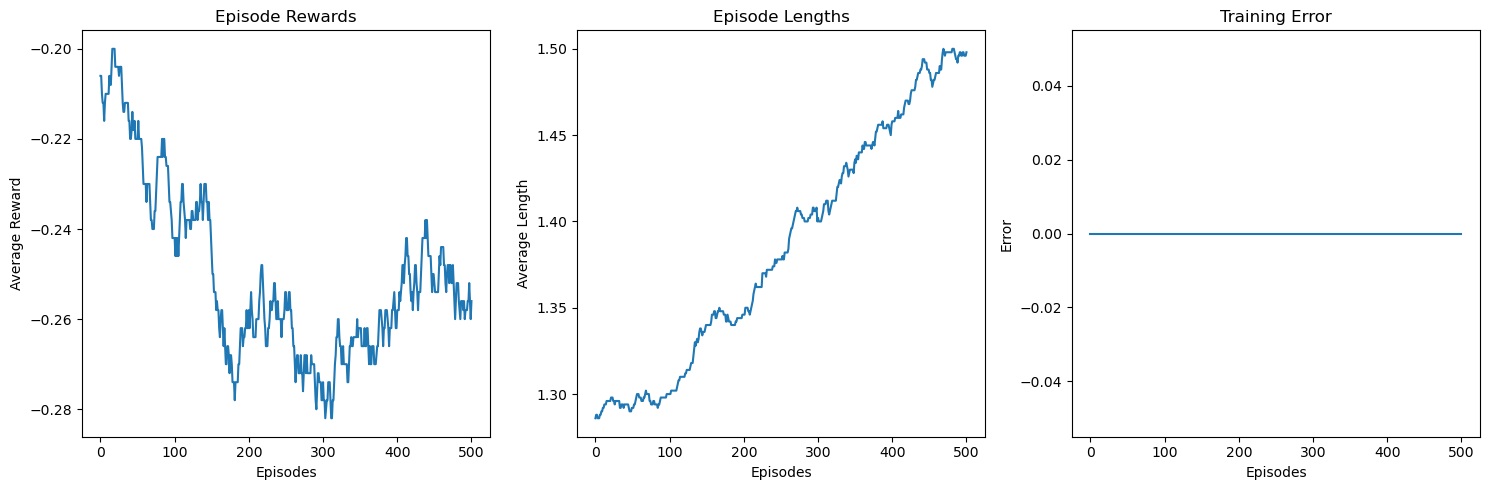

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure data is available
if len(episode_rewards) < rolling_length:
    print("Not enough data to compute moving average.")
else:
    # Compute and plot rolling averages
    fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

    # Plot episode rewards
    axs[0].set_title("Episode Rewards")
    reward_moving_average = np.convolve(np.array(episode_rewards), np.ones(rolling_length), mode='valid') / rolling_length
    axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
    axs[0].set_xlabel('Episodes')
    axs[0].set_ylabel('Average Reward')

    # Plot episode lengths
    axs[1].set_title("Episode Lengths")
    length_moving_average = np.convolve(np.array(episode_lengths), np.ones(rolling_length), mode='valid') / rolling_length
    axs[1].plot(range(len(length_moving_average)), length_moving_average)
    axs[1].set_xlabel('Episodes')
    axs[1].set_ylabel('Average Length')
    
    # Plot training error (if applicable)
    training_error = [0] * len(episode_rewards)  # Placeholder for training error
    axs[2].set_title("Training Error")
    if len(training_error) >= rolling_length:
        training_error_moving_average = np.convolve(np.array(training_error), np.ones(rolling_length), mode='valid') / rolling_length
        axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)
    else:
        axs[2].plot(range(len(training_error)), training_error, label='Raw Error')
    axs[2].set_xlabel('Episodes')
    axs[2].set_ylabel('Error')


    plt.tight_layout()
    plt.show()


### Resources

[OpenAI - Blackjack](https://gymnasium.farama.org/tutorials/training_agents/blackjack_tutorial/)